In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the input data to 4D tensors
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))

# Load the pre-trained model
model = tf.keras.models.load_model('mnist_model.h5')

# Define the loss function
loss_object = tf.keras.losses.CategoricalCrossentropy()

# Define the epsilon value for FGSM
epsilon = 0.6

# Select a random test image
image = x_test[np.random.randint(0, x_test.shape[0])]

# Add a batch dimension to the input tensor
input_tensor = np.expand_dims(image, axis=0)

# Compute the gradient of the loss with respect to the input tensor
input_tensor = tf.convert_to_tensor(input_tensor)
input_tensor = tf.Variable(input_tensor)
with tf.GradientTape() as tape:
    predictions = model(input_tensor)
    loss = loss_object(tf.keras.utils.to_categorical([y_test[np.argmax(predictions)]], 10), predictions)
gradient = tape.gradient(loss, input_tensor)

# Generate the adversarial example using FGSM
signed_grad = tf.sign(gradient)
perturbed_tensor = input_tensor + epsilon * signed_grad
perturbed_tensor = tf.clip_by_value(perturbed_tensor, 0, 1)

# Predict the class of the adversarial example
predictions = model(perturbed_tensor)
original = model(input_tensor)
predicted_class = tf.argmax(predictions[0]).numpy()
original_class =  tf.argmax(original[0]).numpy()

# Print the predicted class
print('Predicted class:', predicted_class)
print('Original class:', original_class)


Predicted class: 5
Original class: 5


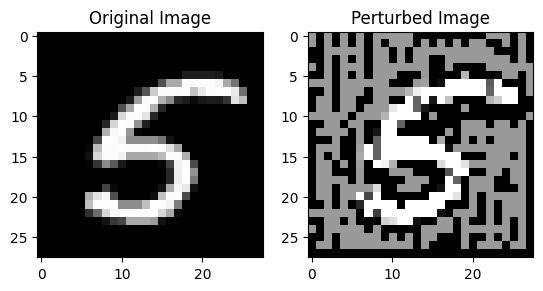

In [ ]:
image = np.squeeze(image)
perturbed_image = np.squeeze(perturbed_tensor.numpy())

# Display the original image and the perturbed image
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(perturbed_image, cmap='gray')
ax2.set_title('Perturbed Image')
plt.show()